<a href="https://colab.research.google.com/github/Akshayrajnadar/predicting_position/blob/master/Predicting_position_of_a_person.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction position of a person
This dataset represent a individual trial performed by a subject wearing a wireless batteryless sensor. Each trial consists of the performance of scripted ADL. The files are anonymized; however, indication of the gender of the participant is
indicated at the end of the file name. For making the model first we are going to import all the required liabraries and then we will clean the data for further process.

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [ ]:
df = pd.read_csv('/content/final.csv')
df.head()

,time,frontal_axis,vertical_axis,lateral_axis,id,signal_strangth,phase,frequency,outcomes
0,0.00,0.612070,0.904870,-0.013684,3,-60.0,5.06830,921.75,4
1,1.25,0.612070,0.904870,-0.013684,3,-62.0,6.19570,920.75,4
2,2.25,0.060972,1.054200,0.020525,2,-66.0,4.69550,925.25,1
3,3.50,0.318930,0.927840,-0.538220,2,-58.5,0.13499,925.75,1
4,4.00,0.565170,0.032153,-0.948730,3,-59.5,4.55440,920.25,3


In [ ]:
df.shape

(45239, 9)

# Input data


In [ ]:
X = df.drop('outcomes', axis = 1)
print(X)

         time  frontal_axis  vertical_axis  lateral_axis  id  signal_strangth  \
0        0.00      0.612070       0.904870     -0.013684   3            -60.0   
1        1.25      0.612070       0.904870     -0.013684   3            -62.0   
2        2.25      0.060972       1.054200      0.020525   2            -66.0   
3        3.50      0.318930       0.927840     -0.538220   2            -58.5   
4        4.00      0.565170       0.032153     -0.948730   3            -59.5   
...       ...           ...            ...           ...  ..              ...   
45234  753.75      0.225130       0.985260      0.031928   1            -49.0   
45235  753.83      0.225130       0.985260      0.031928   1            -49.0   
45236  753.88      0.225130       0.985260      0.031928   1            -49.0   
45237  754.00      0.342380       0.939320      0.157360   1            -51.5   
45238  755.25      0.248580       0.985260      0.020525   1            -59.0   

         phase  frequency  

# Output Data

In [ ]:
Y = df['outcomes']
print(Y)

0        4
1        4
2        1
3        1
4        3
        ..
45234    4
45235    4
45236    4
45237    4
45238    2
Name: outcomes, Length: 45239, dtype: int64


In [ ]:
Y.unique()

array([4, 1, 3, 2])

# Maping

In [ ]:
Y = Y.map({1: 0, 2: 1, 3: 2, 4:3}).astype(str).astype(int)
print(Y)

0        3
1        3
2        0
3        0
4        2
        ..
45234    3
45235    3
45236    3
45237    3
45238    1
Name: outcomes, Length: 45239, dtype: int64


# Dividing into training and test data

In [ ]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
Y_train.shape

(31667,)

In [ ]:
Y_train = np_utils.to_categorical(Y_train,num_classes=4)
print(Y_train)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
Y_test = np_utils.to_categorical(Y_test,num_classes=4)
print(Y_test)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
print(Y_train)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


# Scaling

In [ ]:
mm = MinMaxScaler(feature_range = (0,1))
df = mm.fit_transform(X)

# Model
In the Input part we have used 8 neurons and for the hidden layers we have used 50 neurons with relu activation finction and on the output layer we have used 4 neurons with sigmoid activation function.

In [ ]:
model = models.Sequential()
model.add(Input(shape = [8,]))

model.add(Dense(50 , activation = 'relu'))
model.add(Dense(50 , activation = 'relu'))
model.add(Dense(50 , activation = 'relu'))
model.add(Dense(50 , activation = 'relu'))

model.add(Dense(4 , activation = 'sigmoid'))

# Compiling the model
Here we have ised adam optimizer and categorical_crossentropy as loss function.

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Training the model

In [ ]:
history = model.fit(X_train, Y_train, epochs=50,
          validation_data=(X_test, Y_test))

Epoch 1/50
990/990 [==============================] - 15s 7ms/step - loss: 0.5474 - accuracy: 0.8956 - val_loss: 0.3746 - val_accuracy: 0.9074
Epoch 2/50
990/990 [==============================] - 6s 6ms/step - loss: 0.3398 - accuracy: 0.9104 - val_loss: 0.2504 - val_accuracy: 0.9142
Epoch 3/50
990/990 [==============================] - 9s 9ms/step - loss: 0.2049 - accuracy: 0.9383 - val_loss: 0.1310 - val_accuracy: 0.9651
Epoch 4/50
990/990 [==============================] - 8s 8ms/step - loss: 0.1348 - accuracy: 0.9573 - val_loss: 0.1169 - val_accuracy: 0.9623
Epoch 5/50
990/990 [==============================] - 5s 5ms/step - loss: 0.1415 - accuracy: 0.9560 - val_loss: 0.1534 - val_accuracy: 0.9485
Epoch 6/50
990/990 [==============================] - 5s 5ms/step - loss: 0.1275 - accuracy: 0.9588 - val_loss: 0.1032 - val_accuracy: 0.9655
Epoch 7/50
990/990 [==============================] - 5s 5ms/step - loss: 0.1126 - accuracy: 0.9623 - val_loss: 0.0920 - val_accuracy: 0.9669
Epoch

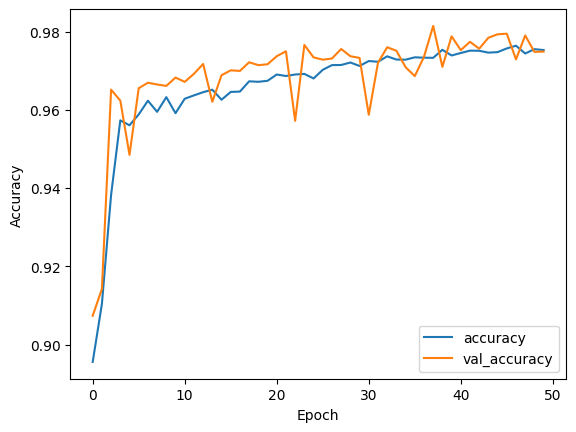

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

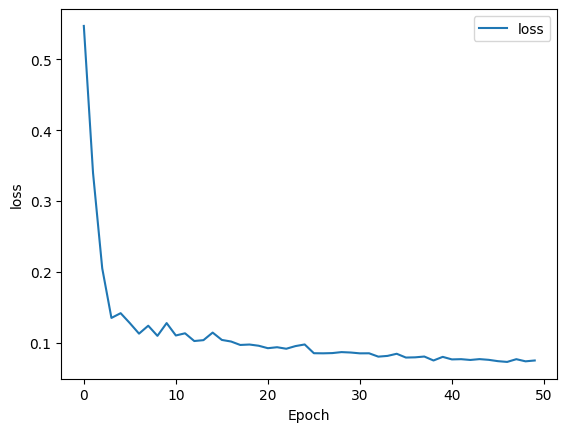

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_prediction = model.predict(X_test)

425/425 [==============================] - 2s 3ms/step


In [ ]:
y_prediction = np.around(y_prediction)

# Accuracy Score

In [ ]:
accuracy_score(Y_test,y_prediction) *100

92.02770409666961